## Importing Libraries

In [1]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt

## Loading image

I convert the image to *uint16* in order to avoid problems in computations (overflow)

In [2]:
img = image.imread('Enhance1.JPG').astype('uint16')

In [3]:
img.shape

(2592, 3872, 3)

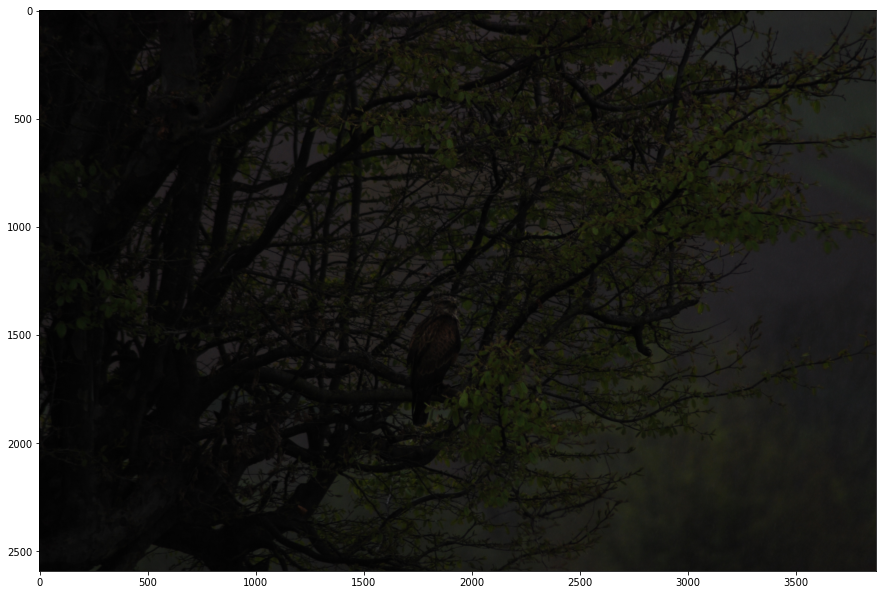

In [4]:
plt.figure(figsize=(15, 15))
plt.imshow(img);

## Visualization of different channels

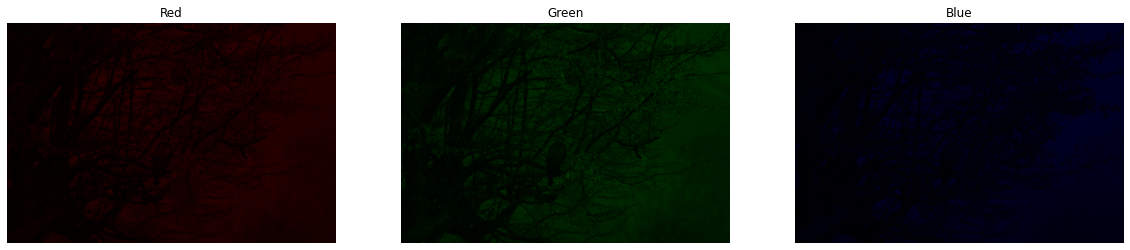

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (20, 10))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    img_cpy = img.copy()
    img_cpy[:, :, [j for j in range(3) if j != i]] = 0
    axs[i].imshow(img_cpy)
    axs[i].axis('off')
    axs[i].set_title(color)

## Image Enhancement
Here we test different methods (which is described in the course slides)

- $min(x+100, 255)$

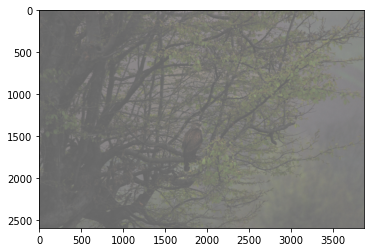

In [6]:
plt.imshow(np.minimum(img+100, 255));

- $min(4x, 255)$

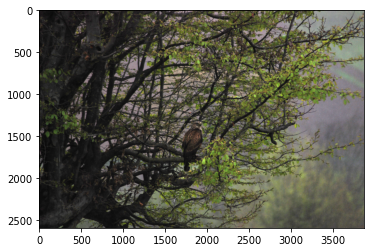

In [7]:
plt.imshow(np.minimum(4*img, 255));

- $\frac{255}{log(256)}log(1+x)$

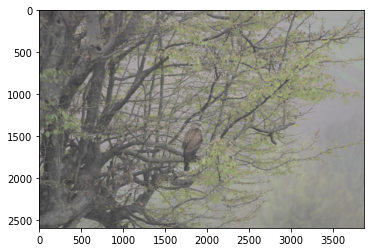

In [8]:
plt.imshow((255 * np.log(1+img) / np.log(256)).astype(int));

- $\frac{255 log(1 + \alpha x)}{log(1 + 255\alpha)}$

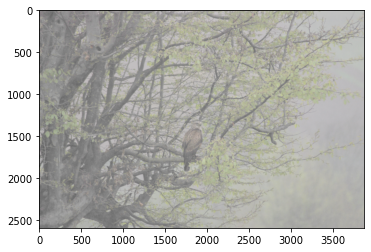

In [9]:
alpha = 10
plt.imshow((255 * np.log(1 + alpha*img) / np.log(1 + 255*alpha)).astype(int));

- $255 (\frac{x}{255})^2$

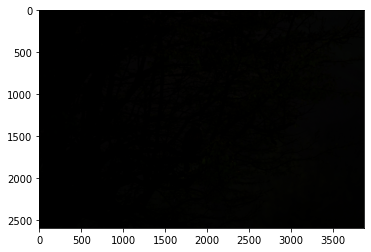

In [10]:
plt.imshow((255 * (img/255)**2).astype(int));

## Contrast Enhancement
For contrast enhancement I use histogram equalization. 

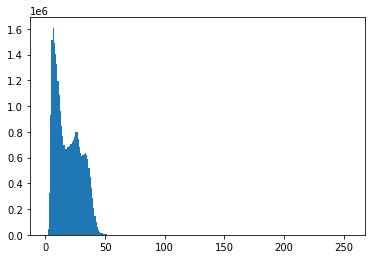

In [11]:
plt.hist(img.flatten(), bins=range(256));

Method explanation: if pixel $i$ has the $k$-th color and we have total $n$ colors, we set it's color to <span style='font-size: 20px;'>$255 \times \frac{\sum^{k}_{j=1}{count_j}}{n}$  </span>

The reason of doing this: we have $n$ colors, each color $i$ with count $count_i$. We want to distribute these colors accross $0$-$255$ equaly. In order to achieve that the basic idea that comes to mind is to set new color to $255 \times \frac{k}{n}$ for the $k$-th color, but, imagine we have $100$ of color $0$ and $100$ of color $1$ and $1$ of color $2$. If we do the latter method, we move $100$ 0s to 0, $100$ 1s to $\sim 127$ and the single 2 to $255$, which doesn't make sense. So we need to do this with the help of counts.

In [12]:
def contrast_enhancement(img):
    result = img.copy()
    colors, cnt = np.unique(img.flatten(), return_counts=True)
    new_colors = np.cumsum(cnt)
    new_colors = 255 * new_colors / new_colors[-1]
    for color, new_color in zip(colors, new_colors):
        result[img == color] = new_color
    
    return result 

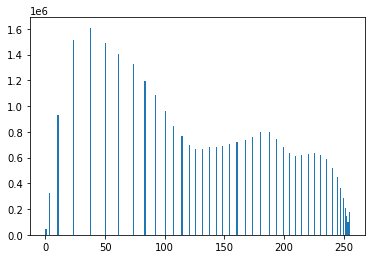

In [13]:
plt.hist(contrast_enhancement(img).flatten(), bins=range(256));

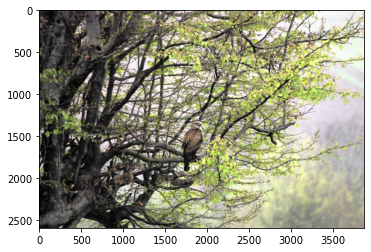

In [14]:
plt.imshow(contrast_enhancement(img));

## Image Enhancement + Contrast Enhancement

Contrast Enhancement

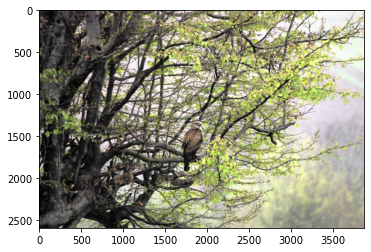

In [19]:
plt.imshow(contrast_enhancement(img));